In [1]:
import numpy as np
import astropy.units as u
import astropy.coordinates as coord
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

from astroquery import open_exoplanet_catalogue as oec

%matplotlib inline
import matplotlib.pyplot as plt

import IPython.display as display

# Load the PANOPTES module dir
import sys
sys.path.append('../..')

# For development
%load_ext autoreload
%autoreload 2

import matplotlib
matplotlib.style.use('ggplot')

/home/wtgee/anaconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from astroplan import Observer, FixedTarget
from astroplan.plots import plot_sky, plot_airmass

from astroplan import (AltitudeConstraint, AirmassConstraint, AtNightConstraint)
from astroplan import is_observable, is_always_observable, time_grid_from_range

### Downloads

Below are two files that should be download to work with the notebook below. The system should be smart about handling the caching but they may take a while initially

In [3]:
from astropy.utils.data import download_file
from astropy.utils import iers
iers.IERS.iers_table = iers.IERS_A.open(download_file(iers.IERS_A_URL, cache=True))

# getting the catalogue from the default remote source
oec_catalog = oec.get_catalogue()

In [4]:
# Import our base class
from panoptes import Panoptes

INFO:PanoptesLogger:Adding warning logging to: PanError
INFO:PanoptesLogger:Adding warning logging to: SerialData
INFO:PanoptesLogger:Adding warning logging to: Target
INFO:PanoptesLogger:Adding warning logging to: Observation
INFO:PanoptesLogger:Adding warning logging to: Scheduler
INFO:PanoptesLogger:Adding warning logging to: Observatory
INFO:PanoptesLogger:Adding warning logging to: Panoptes
INFO:PanoptesLogger:Adding warning logging to: Messaging
INFO:PanoptesLogger:Adding warning logging to: EnvironmentalMonitor
INFO:PanoptesLogger:Adding warning logging to: WeatherStation
INFO:PanoptesLogger:Adding warning logging to: Webcams
INFO:PanoptesLogger:Adding warning logging to: PanSensors


In [5]:
# Get an instance of our Panoptes object
pan = Panoptes()

INFO:Panoptes:********************************************************************************
INFO:Panoptes:Initializing PANOPTES unit
INFO:Panoptes:Checking config
INFO:Panoptes:Welcome PAN 001
INFO:Panoptes:Setting up database connection
INFO:Panoptes:Setting up observatory
INFO:Observatory:Initializing observatory
INFO:Observatory:	 Setting up observatory details
INFO:Observatory:Setting up site details of observatory
INFO:Observatory:	 Setting up mount
INFO:Observatory:Creating mount: ioptron
INFO:PanoptesLogger:Adding warning logging to: AbstractMount
INFO:PanoptesLogger:Adding warning logging to: Mount
INFO:Mount:Creating iOptron mount
INFO:Mount:Setting up commands for mount
INFO:Mount:Loading mount commands file: /var/panoptes/POCS/resources//conf_files/mounts/ioptron.yaml
INFO:Mount:Mount commands updated from /var/panoptes/POCS/resources//conf_files/mounts/ioptron.yaml
INFO:Mount:Mount commands set up
INFO:SerialData:SerialData created
INFO:Mount:Mount created
INFO:Observato

In [9]:
lon = pan.observatory.location.longitude
lat = pan.observatory.location.latitude

target_name = 'WASP-69'

exo_transit_url = 'http://var2.astro.cz/ETD/predict_detail.php?STARNAME={}&PLANET=b&delka={}&sirka={:2.02f}'.format(target_name,lon, lat)
exo_transit_url

'http://var2.astro.cz/ETD/predict_detail.php?STARNAME=WASP-69&PLANET=b&delka=-155.58 deg&sirka=19.54 deg'

In [10]:
display.IFrame(exo_transit_url, 900, 400)

In [4]:
# Get our target
wasp69 = SkyCoord.from_name(target_name)
target = FixedTarget(wasp69, name="Wasp-69")

NameError: name 'target_name' is not defined

In [20]:
evening = pan.observatory.twilight_evening_astronomical(Time.now())
evening.iso

'2015-09-06 05:48:44.825'

In [21]:
morning = pan.observatory.twilight_morning_astronomical(Time.now())
morning.iso

'2015-09-05 14:53:35.481'

In [40]:
time_range = time_grid_from_range((morning,evening))

time_range

<Time object: scale='utc' format='jd' value=[ 2457271.12054955  2457271.14138289  2457271.16221622  2457271.18304955
  2457271.20388289  2457271.22471622  2457271.24554955  2457271.26638289
  2457271.28721622  2457271.30804956  2457271.32888289  2457271.34971622
  2457271.37054956  2457271.39138289  2457271.41221622  2457271.43304956
  2457271.45388289  2457271.47471622  2457271.49554956  2457271.51638289
  2457271.53721622  2457271.55804956  2457271.57888289  2457271.59971622
  2457271.62054956  2457271.64138289  2457271.66221622  2457271.68304956
  2457271.70388289  2457271.72471623]>

In [41]:
constraints = [AltitudeConstraint(10*u.deg, 80*u.deg),
               AirmassConstraint(5), AtNightConstraint.twilight_civil()]

In [42]:
ever_observable = is_observable(constraints, pan.observatory, [target], time_range=time_range)
ever_observable

array([False], dtype=bool)

In [43]:
always_observable = is_always_observable(constraints, pan.observatory, [target], time_range=time_range)
always_observable

array([False], dtype=bool)

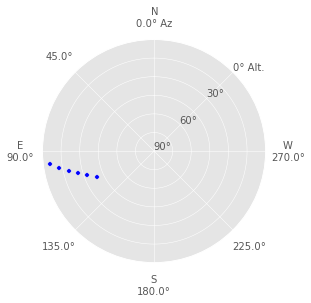

In [44]:
plot_sky(target, pan.observatory, time_range)

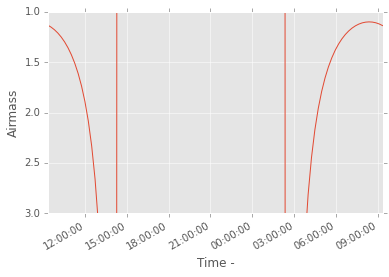

In [47]:
plot_airmass(target, pan.observatory, Time.now())

In [ ]:
# Get the AltAz for the object
wasp33b_altaz = wasp33b.transform_to(AltAz(obstime=midnight+delta_midnight, location=pan.observatory.location))

In [ ]:
plt.figure(figsize=(12,9))

plt.plot(delta_midnight, sun_altaz.alt, color='y', label='Sun')  
plt.scatter(delta_midnight, wasp33b_altaz.alt, c='g', label='WASP-33b', lw=0, s=8)  

plt.fill_between(delta_midnight, 0, 90, sun_altaz.alt < -0*u.deg, color='b', alpha=0.25, zorder=0)  
plt.fill_between(delta_midnight, 0, 90, sun_altaz.alt < -18*u.deg, color='b', alpha=0.05, zorder=0)  

plt.hlines(30, -12, 12, linestyles='dashed', label='Horizon Line')

plt.title("Observability for {} at {} \n {}".format('WASP-33b', pan.observatory.name, midnight.value))
plt.legend(loc='upper left')
plt.xlim(-12, 12)  
plt.xticks(np.arange(13)*2 -12)  
plt.ylim(0, 90)  
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Altitude [deg]')   

In [ ]:
target = wasp33b
observer = pan.observatory
observe_time = Time.now()

plt.figure(figsize=(12,9))
plot_parallactic(target, observer, observe_time)
plt.show()